# PREDECTIVE MODEL

# DATA SOURCES

Failure history: The failure history of a machine or component within the machine.
Maintenance history: The repair history of a machine, e.g. error codes, previous maintenance activities or component replacements.
Machine conditions and usage: The operating conditions of a machine e.g. data collected from sensors.
Machine features: The features of a machine, e.g. engine size, make and model, location.
The data for this example comes from 4 different sources which are 
real-time telemetry data collected from machines
error messages
historical maintenance records that include failures and machine information such as type and age.

In [50]:
import pandas as pd

telemetry = pd.read_csv('telemetry.csv')
errors = pd.read_csv('errors.csv')
maint = pd.read_csv('maint.csv')
failures = pd.read_csv('failures.csv')
machines = pd.read_csv('machines.csv')

In [2]:
# Telemetry data: format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
telemetry.head()

Total number of telemetry records: 876100


,Unnamed: 0,datetime,machineID,volt,rotate,pressure,vibration
0,0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


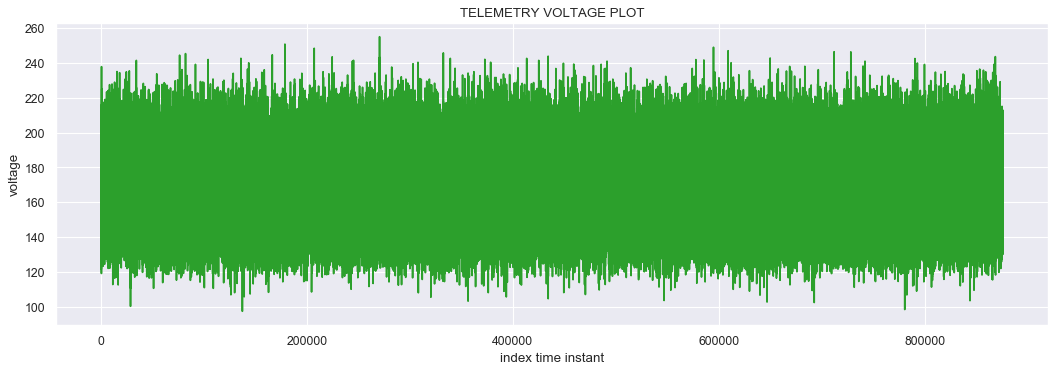

In [49]:
# PLOT OF VOLT TELEMETRY DATA
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/immanuel.i.p/telemetry.csv', parse_dates=['datetime'])
# Draw Plot
def plot_df(df, x, y, title="telemetry", xlabel='index time instant', ylabel='voltage', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.volt, title='TELEMETRY VOLTAGE PLOT')    

In [4]:
# Error data: format datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')

print("Total number of error records: %d" % len(errors.index))
errors.head()

Total number of error records: 3919


,Unnamed: 0,datetime,machineID,errorID
0,0,2015-01-03 07:00:00,1,error1
1,1,2015-01-03 20:00:00,1,error3
2,2,2015-01-04 06:00:00,1,error5
3,3,2015-01-10 15:00:00,1,error4
4,4,2015-01-22 10:00:00,1,error4


In [5]:
# Maintenance data: format datetime field which comes in as string
maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('category')

print("Total number of maintenance records: %d" % len(maint.index))
maint.head()


Total number of maintenance records: 3286


,Unnamed: 0,datetime,machineID,comp
0,0,2014-06-01 06:00:00,1,comp2
1,1,2014-07-16 06:00:00,1,comp4
2,2,2014-07-31 06:00:00,1,comp3
3,3,2014-12-13 06:00:00,1,comp1
4,4,2015-01-05 06:00:00,1,comp4


In [6]:
# Machine data: format datetime field which comes in as string
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,Unnamed: 0,machineID,model,age
0,0,1,model3,18
1,1,2,model4,7
2,2,3,model3,8
3,3,4,model3,7
4,4,5,model3,2


In [7]:
# Failure data: format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,Unnamed: 0,datetime,machineID,failure
0,0,2015-01-05 06:00:00,1,comp4
1,1,2015-03-06 06:00:00,1,comp1
2,2,2015-04-20 06:00:00,1,comp2
3,3,2015-06-19 06:00:00,1,comp4
4,4,2015-09-02 06:00:00,1,comp4


Text(0, 0.5, 'Count')

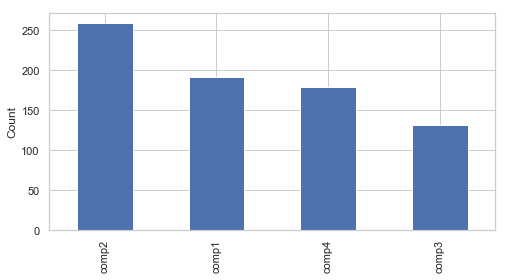

In [9]:
#plot of failures

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
failures=pd.read_csv("C:/Users/immanuel.i.p/failures.csv")
sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')
#TO CHECK FOR MISSING VALUES


# DATA ANALYSIS

Evaluating the telemetry data

In [10]:
## DETERMINING OVERALL LAGGING FEATURES FROM TELEMETRY
#FINDING MEAN AND STANDARD DEVIATIONS FOR THE VARIABLES

[176.21785302 162.8792229  170.98990241 ... 192.4834144  165.47530995
 171.33603658]
Mean value:        170.77773639409241
Standard deviation: 15.509105355275834
Minimum voltage:     97.333603782359
Maximum voltage:     255.124717259791


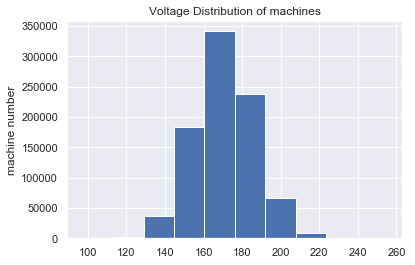

In [12]:
import pandas as pd
import numpy as np
#   MACHINE VOLTAGE 
voltage= np.array(telemetry['volt'])
print(voltage)
print("Mean value:       ", voltage.mean())
print("Standard deviation:", voltage.std())
print("Minimum voltage:    ", voltage.min())
print("Maximum voltage:    ", voltage.max())


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(voltage)
plt.title('Voltage Distribution of machines')
plt.ylabel('machine number');



[113.07793546  95.46052538  75.23790486 ...  94.13283675 104.08107285
  79.09553811]
Mean :  100.85866799107886
Standard deviation: 11.048673087041278
Minimum pressure: 51.23710577342529
Maximum  pressure:  185.95199773086603


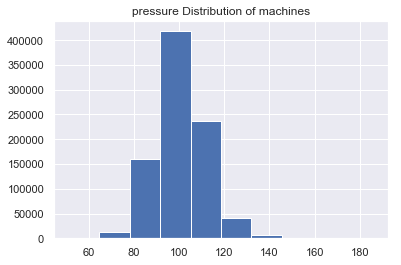

In [13]:
	#   MACHINE PRESSURE
pressure= np.array(telemetry['pressure'])
print(pressure)
print("Mean : ", pressure.mean())
print("Standard deviation:", pressure.std())
print("Minimum pressure:", pressure.min())
print("Maximum  pressure: ", pressure.max())
	
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(pressure)
plt.title('pressure Distribution of machines');

[418.50407822 402.74748957 527.34982545 ... 447.81652424 413.77166996
 496.09686958]
Mean value:  446.60511889626366
Standard deviation: 52.673855974052316
Minimum pressure: 138.432075304341
Maximum  pressure:  695.020984403396


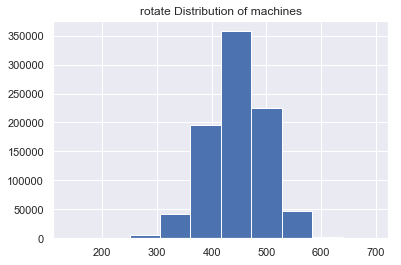

In [15]:
#   MACHINE ROTATION
rotate= np.array(telemetry['rotate'])
print(rotate)
print("Mean value: ",rotate.mean())
print("Standard deviation:", rotate.std())
print("Minimum pressure:", rotate.min())
print("Maximum  pressure: ", rotate.max())

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(rotate)
plt.title('rotate Distribution of machines');

[45.08768576 43.41397268 34.17884712 ... 48.31456103 44.83525866
 37.84524546]
Mean value:  40.38500676114475
Standard deviation: 5.370357496793103
Minimum pressure: 14.877053998383
Maximum  pressure:  76.7910723016723
[45.08768576 43.41397268 34.17884712 ... 48.31456103 44.83525866
 37.84524546]


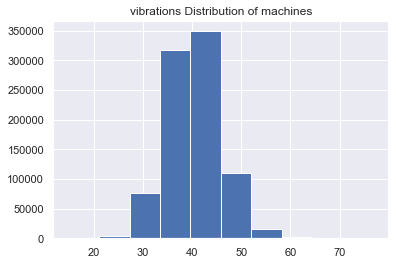

In [16]:
#   MACHINE VIBRATION
vibration= np.array(telemetry['vibration'])
print(vibration)
print("Mean value: ",vibration.mean())
print("Standard deviation:", vibration.std())
print("Minimum pressure:", vibration.min())
print("Maximum  pressure: ", vibration.max())
print(vibration)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(vibration)
plt.title('vibrations Distribution of machines');

# FEATURE ENGG

The first step in predictive maintenance applications is feature engineering which requires bringing the different data sources together to create features that best describe a machines's health condition at a given point in time.

# Telemetry lag feature selection

In [17]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='mean').unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='std').unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

C:\Users\immanuel.i.p\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
C:\Users\immanuel.i.p\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [18]:
# merge columns of feature set
telemetry_feat = pd.concat([telemetry_mean_3h, telemetry_sd_3h.ix[:, 2:6]],axis=1).dropna()
telemetry_feat.describe()

C:\Users\immanuel.i.p\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
count,292000.000000,292000.000000,292000.000000,292000.000000,292000.000000,292000.000000,292000.000000,292000.000000,292000.000000
mean,50.500000,170.777300,446.605807,100.858510,40.384920,13.299090,44.456338,8.885976,4.441164
std,28.866119,9.500846,33.130042,7.414517,3.478823,6.965914,23.216712,4.656211,2.320302
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278
25%,25.750000,164.449510,427.560977,96.238546,38.147765,8.027455,26.903705,5.370581,2.684790
50%,50.500000,170.434378,448.382261,100.234191,40.145837,12.495658,41.794719,8.346020,4.173955
75%,75.250000,176.611778,468.448505,104.406557,42.227559,17.688490,59.104130,11.790303,5.900106
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595


# Error lag feature selection

In [ ]:
#create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count=error_count.drop(['Unnamed: 0'], axis=1)
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']
#combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head(13)

In [20]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# TIME SINCE LAST REPLACEMENT

In [21]:
# make a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep=comp_rep.drop(['Unnamed: 0'],axis=1)
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']
# joining repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()
# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep, on=['datetime', 'machineID'],how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])
components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
# convert indicator to most recent date of component
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime'].astype('datetime64[ns]')
    comp_rep[comp]=comp_rep[comp].astype('datetime64[ns]')
# forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')
# remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]
# replace dates of most recent component change with days since most recent component change
for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')
comp_rep.describe()


,machineID,comp1,comp2,comp3,comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,53.525185,51.540806,52.725962,53.834191
std,28.866087,62.491679,59.269254,58.873114,59.707978
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,13.291667,12.125000,13.125000,13.000000
50%,50.500000,32.791667,29.666667,32.291667,32.500000
75%,75.250000,68.708333,66.541667,67.333333,70.458333
max,100.000000,491.958333,348.958333,370.958333,394.958333


In [22]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


# Concat of machine features

In [25]:
import pandas as pd
telemetry_feat = pd.concat([telemetry_mean_3h, telemetry_sd_3h.ix[:, 2:6]],axis=1).dropna()
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')
print(final_feat.head())

C:\Users\immanuel.i.p\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


   machineID            datetime  voltmean_3h  rotatemean_3h  pressuremean_3h  \
0          1 2015-01-01 09:00:00   170.028993     449.533798        94.592122   
1          1 2015-01-01 12:00:00   164.192565     403.949857       105.687417   
2          1 2015-01-01 15:00:00   168.134445     435.781707       107.793709   
3          1 2015-01-01 18:00:00   165.514453     430.472823       101.703289   
4          1 2015-01-01 21:00:00   168.809347     437.111120        90.911060   

   vibrationmean_3h  voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  \
0         40.893502   6.721032    67.849599      18.934956        5.874970   
1         34.255891   7.596570    50.120452       8.555032        7.662229   
2         41.239405  10.124584    55.084734       5.909721        5.169304   
3         40.373739   4.673269    42.047278       4.554047        2.106108   
4         41.738542  14.752132    47.048609       4.244158        2.207884   

   ...  error3  error4  error5   comp1    co

In [36]:
failures.dtypes

Unnamed: 0             int64
datetime      datetime64[ns]
machineID              int64
failure               object
dtype: object

In [35]:
failures['datetime']=pd.to_datetime(failures['datetime'])

# LABEL CONSTRUCTION

When using multi-class classification for predicting failure due to a problem, labelling is done by taking a time window prior to the failure of an asset and labelling the feature records that fall into that window as "about to fail due to a problem" while labelling all other records as normal. This time window should be picked according to the business case: in some situations it may be enough to predict failures hours in advance, while in others days or weeks may be needed to allow e.g. for arrival of replacement parts.

In [37]:
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')
# labeled_features.columns
labeled_features["failure"]=labeled_features["failure"].astype(object).fillna(method = 'bfill', limit = 7)
labeled_features["failure"] = labeled_features["failure"].fillna('none')

labeled_features["failure"]=labeled_features["failure"].astype('category')
labeled_features.groupby('failure').count()
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error5,comp1,comp2,comp3,comp4,Unnamed: 0_x,model,age,Unnamed: 0_y,failure
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,...,0.0,19.125,214.125,154.125,169.125,0,model3,18,NaN,none
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,...,0.0,19.250,214.250,154.250,169.250,0,model3,18,NaN,none
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,...,0.0,19.375,214.375,154.375,169.375,0,model3,18,NaN,none
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,...,0.0,19.500,214.500,154.500,169.500,0,model3,18,NaN,none
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,...,0.0,19.625,214.625,154.625,169.625,0,model3,18,NaN,none


In [38]:
final_feat['error1']=final_feat['error1'].fillna(0)
final_feat['error2']=final_feat['error2'].fillna(0)
final_feat['error3']=final_feat['error3'].fillna(0)
final_feat['error4']=final_feat['error4'].fillna(0)
final_feat['error5']=final_feat['error5'].fillna(0)
final_feat['comp1']=final_feat['comp1'].fillna(0)
final_feat['comp2']=final_feat['comp2'].fillna(0)
final_feat['comp3']=final_feat['comp3'].fillna(0)
final_feat['comp4']=final_feat['comp4'].fillna(0)

In [39]:
labeled_features=labeled_features.drop(['Unnamed: 0_x'],axis=1)
labeled_features=labeled_features.drop(['Unnamed: 0_y'],axis=1)

In [40]:
labeled_features.columns

Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'error1', 'error2', 'error3',
       'error4', 'error5', 'comp1', 'comp2', 'comp3', 'comp4', 'model', 'age',
       'failure'],
      dtype='object')

# Model Building and Evaluation

In [42]:
y = labeled_features[['failure']]
x = labeled_features.drop(['machineID','datetime','failure','model'],axis=1)

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=12345)

In [44]:
np.isnan(X_train['comp1']).sum()

0

In [45]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

# Gradient Boosting algorithm

In [46]:

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

C:\Users\immanuel.i.p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

# TESTING THE DATA

In [47]:
pred_test_y = gb_model.predict(X_test)

In [48]:
train_acc=metrics.accuracy_score(y_train, gb_model.predict(X_train))
test_acc=metrics.accuracy_score(y_test, gb_model.predict(X_test))
#f1 score
precision_recall_f1=precision_recall_fscore_support(y_test, pred_test_y, average='macro')
print('GB classifier training set accuracy:',train_acc,'\n','GB classifier test set accuracy:', test_acc,'\n F1 score:',precision_recall_f1)

GB classifier training set accuracy: 0.9914200040111726 
 GB classifier test set accuracy: 0.990469450880577 
 F1 score: (0.8337580840543357, 0.7196296658768465, 0.7705455285010786, None)
